# Analysis of two continuos variables

In [1]:
pf<-read.csv("C:/Users/sleeba/OneDrive/Code Base - R/Introduction to R -- Udacity/lesson3/pseudo_facebook.tsv",
            sep="\t",header=T)
library(ggplot2)

### We'll play around with **`scatter plots`** 

In [ ]:
#qplot(x=age,y=friend_count, data = pf)

In [2]:
summary(pf$age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  13.00   20.00   28.00   37.28   50.00  113.00 

Warning message:
"Removed 4906 rows containing missing values (geom_point)."

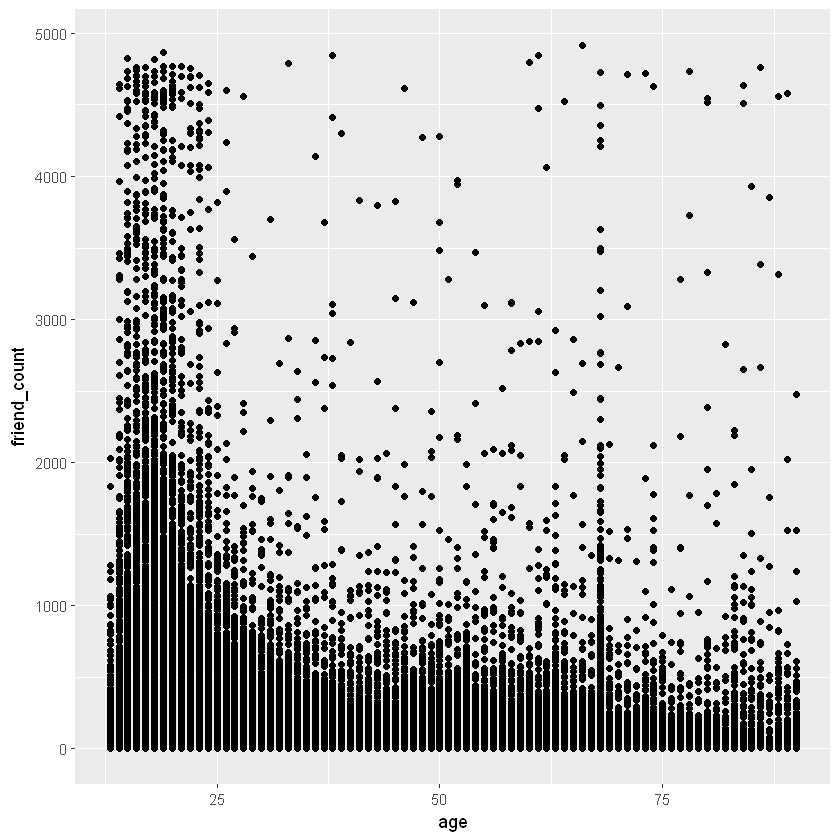

In [4]:
ggplot(aes(x=age,y=friend_count),data=pf)+ geom_point()+ xlim(13,90)

# This is overplotted in lower range of the plot. So we bring in **`alpha`** parameter in and set the transperancy to see the data points better.

Warning message:
"Removed 4906 rows containing missing values (geom_point)."

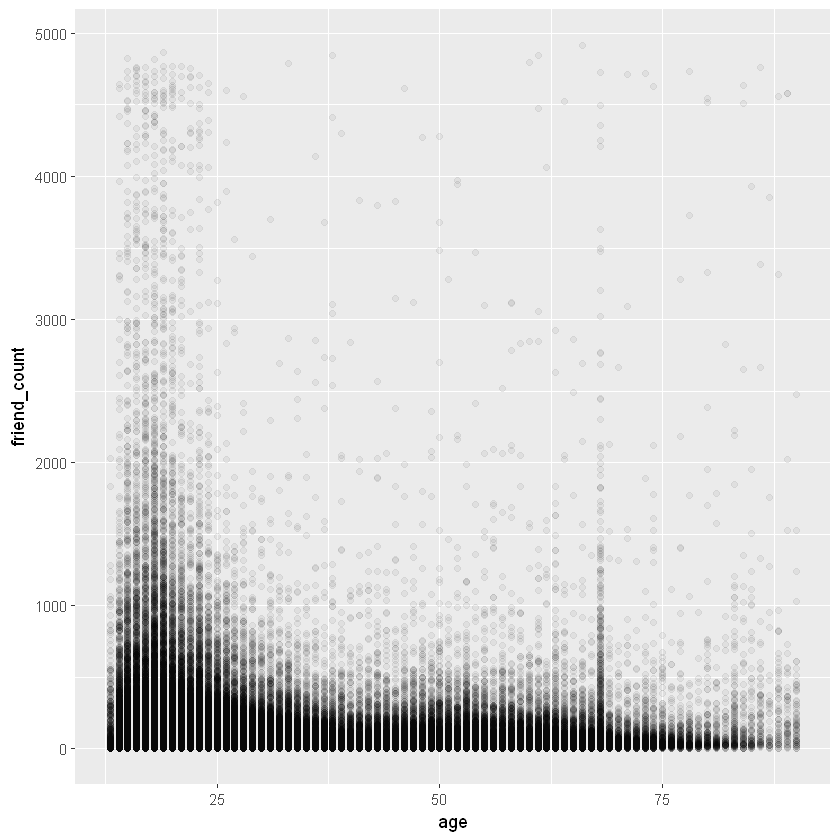

In [5]:
ggplot(aes(x=age,y=friend_count),data=pf)+
geom_point(alpha=1/20)+
xlim(13,90)

## **`alpha`** is 1/20 means for one dot to get completely dark, then it should have 20 data points
## When the y axis are too wide, use the **`coord_trans`**
## Using **`geom_jitter`** we can add some noise to edges and get a better picture of a continous variable like Age ( though they are discrete values )

** The difference between transforming the scales and transforming the coordinate system is that scale transformation occurs **`BEFORE`** statistics, and coordinate transformation afterwards.  Coordinate transformation also changes the shape of geoms. We can use it when the variation of points in the y-axis is large.**

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


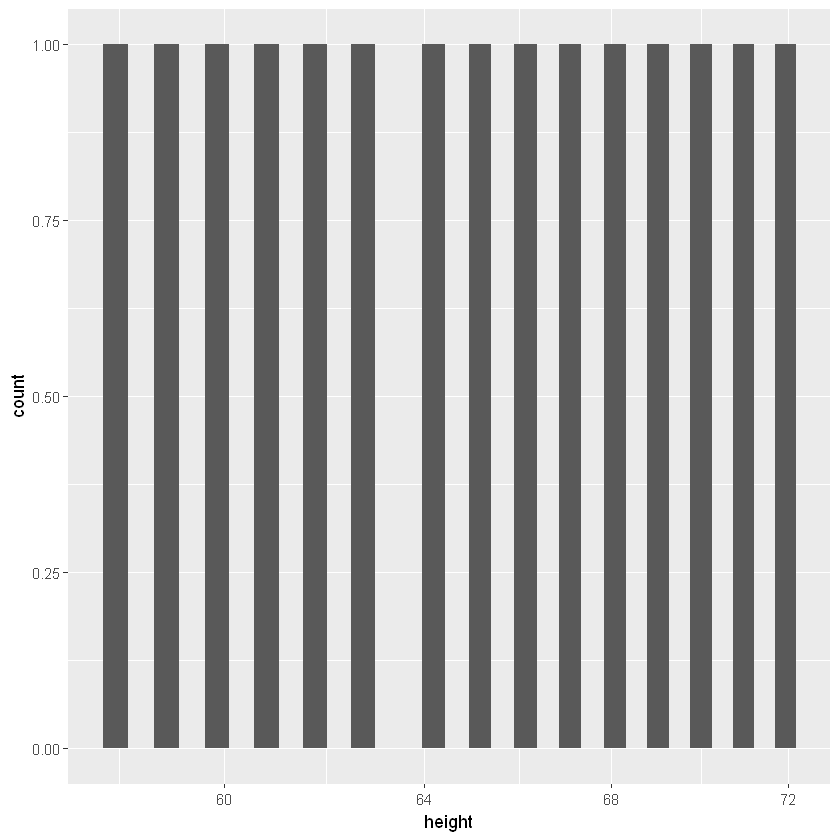

In [8]:
data(women)
qplot(x = height, data = women) +coord_trans(x = "log10")

Warning message:
"Removed 5184 rows containing missing values (geom_point)."

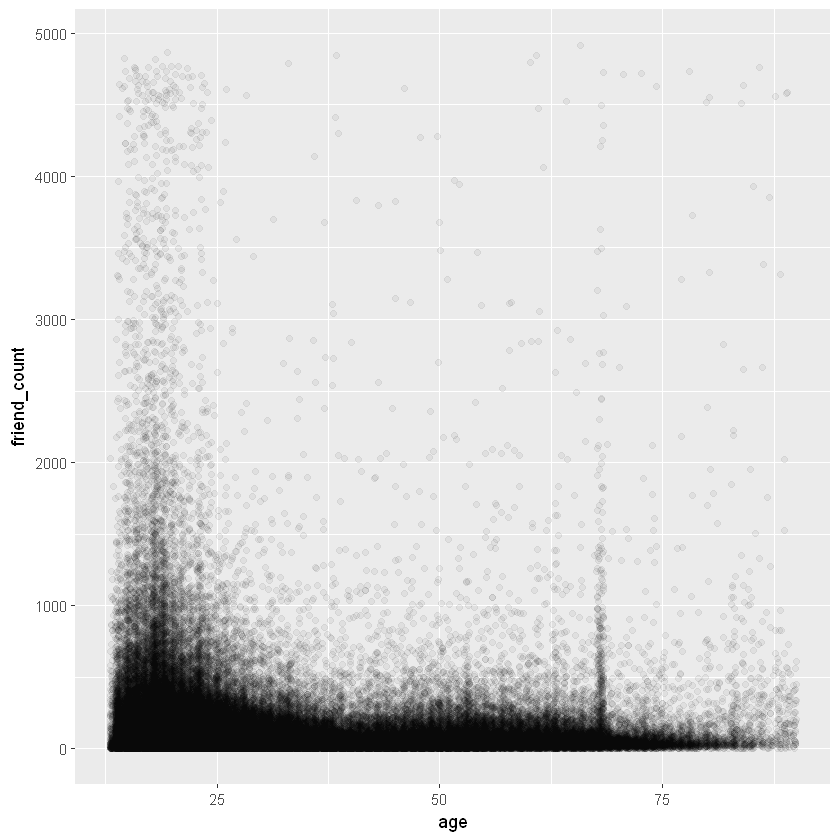

In [2]:
ggplot(aes(x=age,y=friend_count),data=pf)+
geom_jitter(alpha=1/20)+
xlim(13,90)

In [10]:
summary(pf$age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  13.00   20.00   28.00   37.28   50.00  113.00 

In [11]:
summary(pf$friend_count)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0    31.0    82.0   196.4   206.0  4923.0 

## Note:

~~~~ 
ggplot(aes(x=age,y=friend_count),data=pf)+
geom_jitter(alpha=1/20)+
xlim(13,90)+coord_trans(y ="sqrt") ~~~~

The above code won't work because of following reasons. 
> 1. The jitter will add and substract values to spread the distribution. But min. value of friend_count is zero for some users. Thus we may get a negative value in the y axis which has an imaginary root.
> 2. We need to specify that, the transformation does not include the value of zero. A minimum height is needed to be set for that (h=0) to jitter the values. 
> 3. We can't use geom_jitter anymore, since the it will apply jitter to both axis.

Warning message:
"Removed 4906 rows containing missing values (geom_point)."

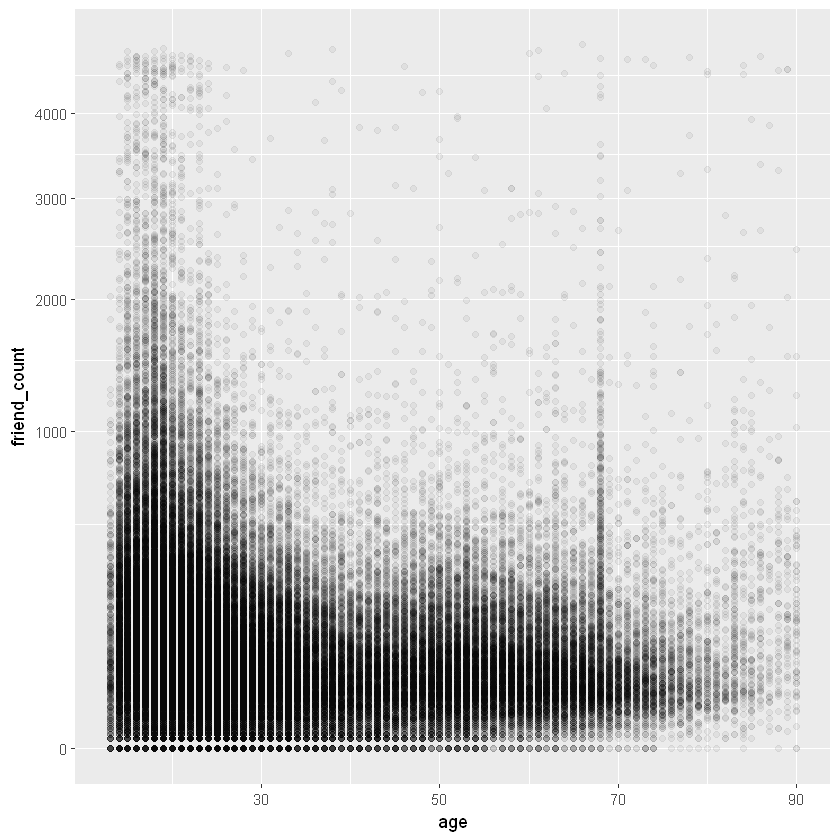

In [12]:
ggplot(aes(x=age,y=friend_count),data=pf)+
geom_point(alpha=1/20)+
xlim(13,90)+
coord_trans(y ="sqrt")

Warning message:
"Removed 5189 rows containing missing values (geom_point)."

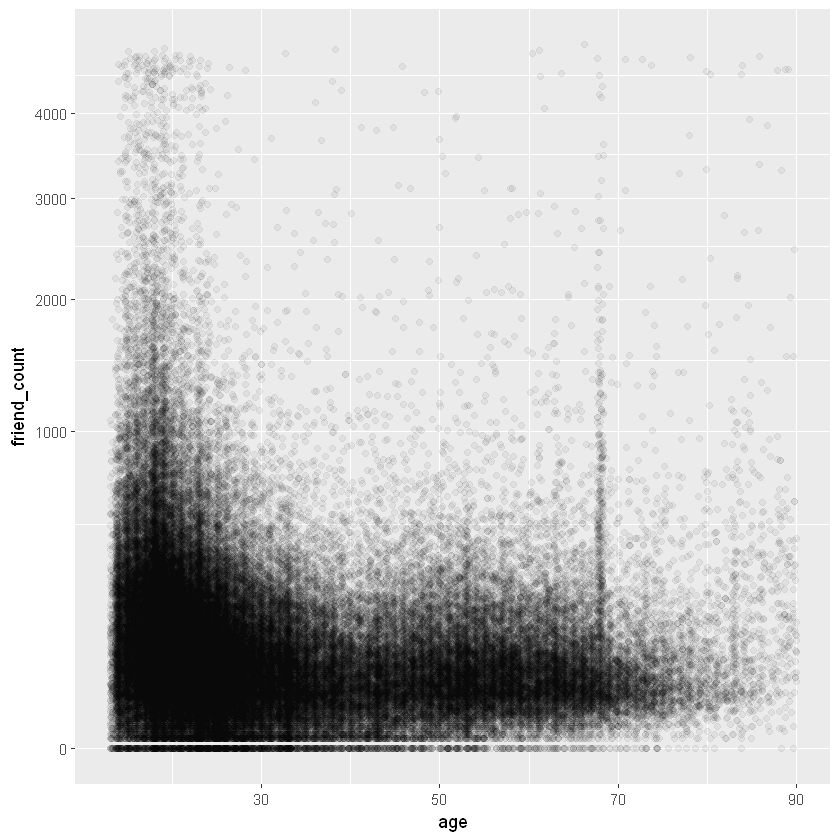

In [13]:
ggplot(aes(x=age,y=friend_count),data=pf)+
geom_point(alpha=1/20, position = position_jitter(h=0))+
xlim(13,90)+
coord_trans(y ="sqrt")

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.
Warning message:
"Removed 5190 rows containing missing values (geom_point)."

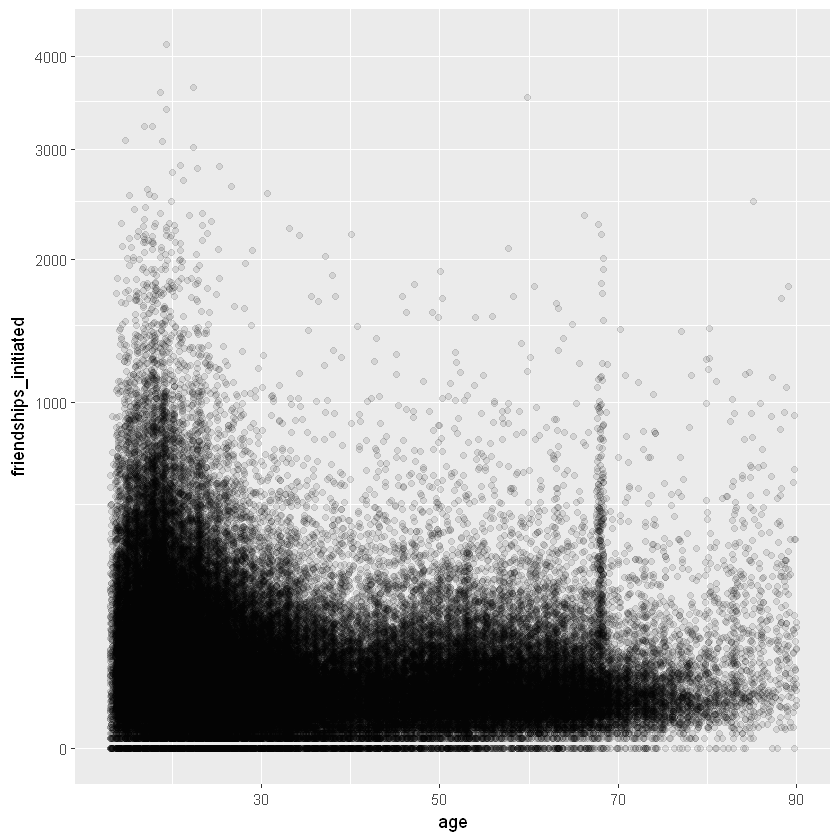

In [9]:
ggplot(aes(x=age,y=friendships_initiated),data=pf)+ geom_point(alpha=1/10, position = position_jitter(h=0))+
xlim(13,90)+ coord_trans(y ="sqrt") +xlim(13,90)
# +scale_x_continuous(breaks = seq(0,90,10))
# geom_point(alpha=1/20, position = position_jitter(h=0))+
# xlim(13,90)+


**`So far we have learned to plot two variables, adjust them and get better inferences from it. Sometimes this won't be enough. We will be needing many other variations to look into such as mean, median, percentage of a variable to another variable as the important inferences won't be readily available to understand if we plot all the values as above.`** 

## library(dplyr)

`This library will help to transform some part of our dataframe without disturbing others. 

In [3]:
library(dplyr)

`Below we have created two new variables which can help us analyse the data more deep. We grouped the dataframe with regard to age column, then summarised by adding mean friend count in each group, median friend_count in each group and count of people in each group. We can arrange the resulting dataframe in the ascending order of friend count.`

In [19]:
age_group  <- group_by(pf,age)
friend_count_by_age  <-  summarise(age_group,
                                   friend_count_mean=mean(friend_count),
                                   friend_count_median=median(friend_count),
                                   n=n())
friend_count_by_age  <-  arrange(friend_count_by_age,age)

In [20]:
names(friend_count_by_age)

[1] "age"                 "friend_count_mean"   "friend_count_median"
[4] "n"

In [22]:
head(friend_count_by_age)

age,friend_count_mean,friend_count_median,n
13,164.7500,74.0,484
14,251.3901,132.0,1925
15,347.6921,161.0,2618
16,351.9371,171.5,3086
17,350.3006,156.0,3283
18,331.1663,162.0,5196


## Plot of Age vs Count of Friends 

Warning message:
"Removed 23 rows containing missing values (geom_path)."

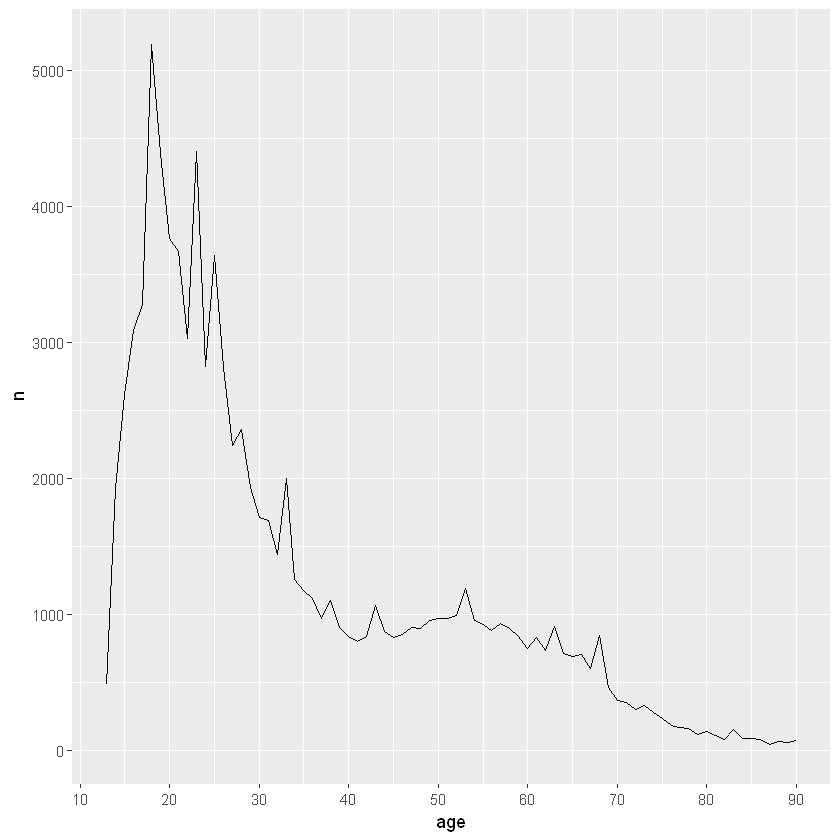

In [23]:
ggplot(aes(x=age,y=n),data=friend_count_by_age)+ 
geom_line()+
scale_x_continuous(breaks = seq(0,90,10),limits = c(13,90))
#+ coord_trans(y ="sqrt") +

## `We can do the same process as a chain, using the dplyr pipe function `

In [4]:
friend_count_by_age  <- pf %>% 
                        group_by(age) %>% 
                        summarise(friend_count_mean=mean(friend_count),
                                   friend_count_median=median(friend_count), n=n()) %>% 
                        arrange(age)

## `Mean friend_count vs age`
    

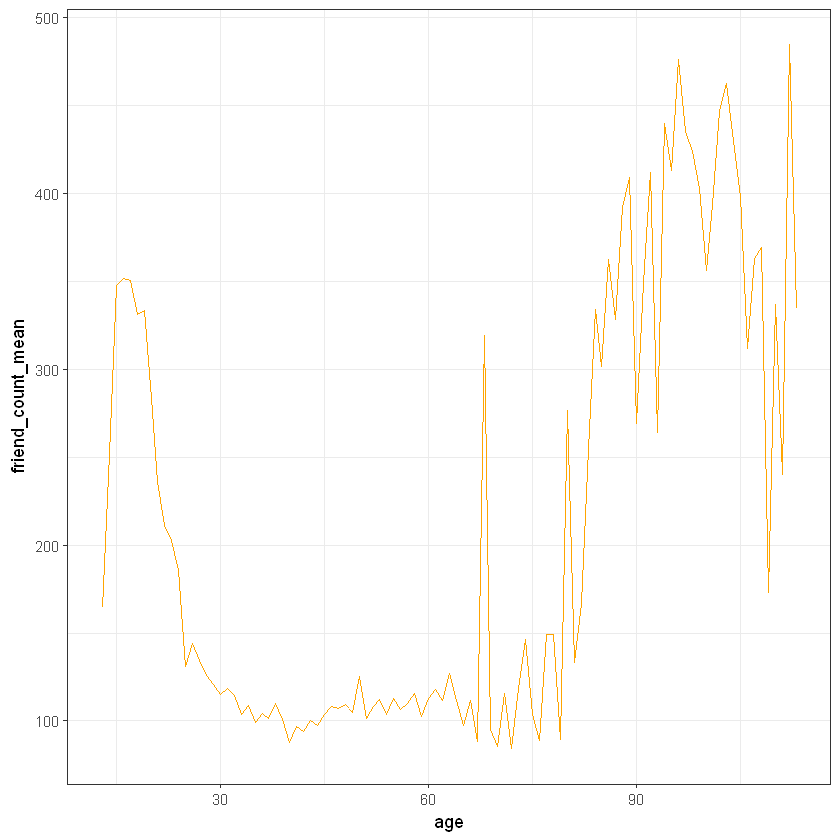

In [31]:
ggplot(aes(x=age,y=friend_count_mean),data=friend_count_by_age)+
geom_line(color = 'orange') +theme_bw()

# Mean friend count by age (`overlaying summaries over raw data`)

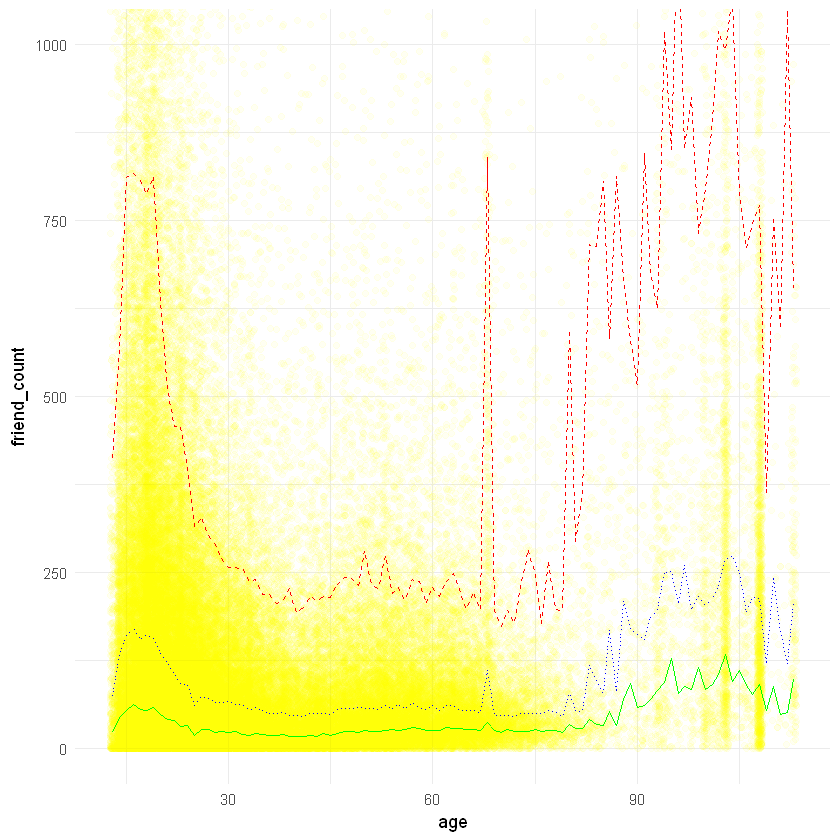

In [33]:
ggplot(aes(x=age,y=friend_count),data = pf)+ 
coord_cartesian(xlim = c(13, 90)) +
geom_point(alpha = 1/20, position = position_jitter(h=0),color = "yellow") +
geom_line(stat='summary',fun.y=median, color = "blue", linetype=3) +
geom_line(stat = 'summary', fun.y = quantile, fun.args = list(probs = .9), linetype=2, color = "red") +
geom_line(stat = 'summary', fun.y = quantile, fun.args = list(probs = .25), color = "green")+
coord_cartesian(ylim = c(0,1000)) + theme_minimal() +scale_colour_manual(values=c("red","green","blue"))
#geom_line(stat='summary',fun.y=mean)
#geom_line(stat='summary', fun.y=quantile, fun.args=list(probs=0.1), linetype=2,color='red')